<hr>

# <center> Building Machine learning Model For Labtop Computers

<hr>


In [69]:
# EDA
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import datetime
# Data Preprocesing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor # boosting technique
from sklearn.ensemble import StackingRegressor #Stacking regressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import LinearSVR 
#ensemble regression
from sklearn.ensemble import BaggingRegressor  #bagging technique
from sklearn.model_selection import GridSearchCV

from datasist.structdata import detect_outliers
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
import joblib
# display all the columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Plots settings
# Standard figure size for all
sns.set(rc={'figure.figsize': [15, 7]}, font_scale=1.2)
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')


In [70]:
def Get_label_enco(df,cat_cols,num_cols,bool_cols):
    # for Reverse Label Encoder Features to dicts for using in the Future
    for i in df[cat_cols].columns:
        la=LabelEncoder()
        la.fit(df[i].values.flatten())
        globals()[i] = dict(zip(df[i].values.flatten(),la.transform(df[i].values.flatten()) ))
    global df_data_model
    label_enc = LabelEncoder()
    df[cat_cols] =  df[cat_cols].apply(label_enc.fit_transform)
    df_data_model = pd.concat([df[cat_cols] , df[num_cols],df[bool_cols]] , axis=1)
    ############################################
    return df_data_model.sample(5)

In [71]:
def Get_Missing_Values(df):
    global new_table
    Missing_Values_sum = df.isnull().sum()
    percent_ = Missing_Values_sum * 100 / len(df)
    new_table = pd.concat([Missing_Values_sum,percent_] , axis=1)
    new_table = new_table.rename(columns={0:"Missing Values" , 1: "percent"})
    missing40 = list(new_table[new_table["percent"]> 50].index)
    new_table = new_table[new_table["Missing Values"] !=0].sort_values("percent",ascending=False).round(2)
    print("DataFrame has " , df.shape[1] , " columns")
    print("DataFrame has " , new_table.shape[0] , "Columns with missing values")
    return new_table

In [72]:
def Classifiy_data(df):
    print("new_Data shape ", df.shape)
# categorical Columns
    global categorical_columns
    categorical_columns = [
        column for column in df.columns if df[column].dtypes == "O"]
    global Bool_columns
    Bool_columns = [
        column for column in df.columns if df[column].dtypes == "bool"]
    global numerical_columns
    numerical_columns = [
        column for column in df.columns if df[column].dtypes != "O"]
    #print("Number of numeric Columns: ", len(numerical_columns))
    #print(numerical_columns)
    #print("_____________________________________")
    #print("Number of categorical Columns: ", len(categorical_columns))
    #print(categorical_columns)
    #print("_____________________________________")
    #print("Number of Bool Columns: ", len(Bool_columns))
    #print(categorical_columns)

In [73]:
pd.set_option('max_colwidth', 20)
Labtop = pd.read_csv("CSV/Labtop.csv", low_memory=False)
Labtop.drop(Labtop.filter(regex="Unname"), axis=1,
               inplace=True)  # Remove Unnamed Column
Labtop.drop(["Title_Product","Model","Series","Product_Price_US","Product_Price_SR","Shipping_Price","Product_URL","Product_Images"] ,axis=1,inplace=True)
Labtop.sample(2)

,Brand,Color,Date_First_Year,Product_Type,Product_Style,Product_Usage,Weight,CPU_Brand,CPU_Model,CPU_Series,CPU_Gen,Cores,CPU_Speed,Core_Name,GPU_Brand,GPU_Model,Video_Memory,Is_SSD,Storage_HDD,Storage_SSD,SSD_Type,Memory_capacity,Memory_Type,Memory_Speed,OS_Corporation,OS_Version,Screen_Size,X_res,Y_res,Res_Type,Touchscreen,WideScreen,Screen_Tec,WebCam,AC_Power,Battery_Cell,Power_Supply_W,Bluetooth,Bluetooth_V,Ethernet,WiFi_Ver,Has_Thunderbolt,Type_C_Count,Type_A_Count,USB_C_Ver,Total_Price,PPI
13736,ACER,Black,2022.0,Labtop Computers,Mini,Personal,2.676195,Intel,Core,i5,9th,4.0,2.4,NaN,NVIDIA,GeForce,4.0,True,2048.0,512.0,NaN,8.0,DDR4,NaN,Microsoft,Windows 10 Home,15.6,1920.0,1080.0,FHD,True,False,IPS,Yes,45.0,4.0,NaN,False,NaN,True,Wifi 6,False,0.0,0.0,USB C 3.0,4975.37,141.0
6861,LENOVO,Black,2018.0,Labtop Computers,Thin,Business,3.583380,Intel,Core,i7,1st,4.0,2.8,Kaby Lake,NVIDIA,Quadro,2.0,True,1024.0,500.0,M.2,8.0,DDR4,2400.0,Microsoft,Windows 10 Pro,17.3,1920.0,1080.0,FHD,False,False,IPS,Yes,230.0,8.0,NaN,True,4.1,True,NaN,False,0.0,0.0,USB C 3.0,13049.75,127.0


In [74]:
# For Resolve ValueError: Input contains infinity or a value too large for dtype('float64'). Convert long float to short
Labtop["PPI"]= Labtop["PPI"].replace([np.inf, -np.inf], np.nan)
Labtop.describe()

,Date_First_Year,Weight,Cores,CPU_Speed,Video_Memory,Storage_HDD,Storage_SSD,Memory_capacity,Memory_Speed,Screen_Size,X_res,Y_res,AC_Power,Battery_Cell,Power_Supply_W,Bluetooth_V,Type_C_Count,Type_A_Count,Total_Price,PPI
count,23187.000000,21937.000000,22156.000000,23176.000000,9905.000000,23187.000000,23187.000000,23164.000000,10464.000000,23187.000000,23071.000000,23071.000000,13838.000000,14298.000000,4326.000000,15649.000000,23110.000000,22854.000000,23187.000000,21728.000000
mean,2021.418855,2.228188,4.672188,2.252443,5.403534,239.572605,736.516367,17.730235,2579.800076,14.364407,1874.528109,1081.296086,95.754950,3.381102,256.185160,4.805572,1.672955,1.643782,5904.545634,151.339654
std,0.981061,1.448688,2.674538,0.699788,3.117322,508.792380,1053.166609,16.696883,708.761255,4.067611,690.061139,417.466147,72.134432,1.864516,188.168121,0.481218,1.882320,1.811792,4383.172225,46.611542
min,2014.000000,0.498952,1.000000,0.900000,1.000000,0.000000,0.000000,1.171875,1066.000000,0.000000,0.000000,0.000000,20.000000,0.000000,65.000000,2.000000,0.000000,0.000000,461.140000,0.000000
25%,2021.000000,1.651076,2.000000,1.800000,4.000000,0.000000,256.000000,8.000000,2400.000000,14.000000,1600.000000,900.000000,45.000000,3.000000,170.000000,4.200000,0.000000,0.000000,3095.400000,127.000000
50%,2022.000000,1.850657,4.000000,2.400000,4.000000,0.000000,512.000000,16.000000,2400.000000,15.600000,1920.000000,1080.000000,65.000000,3.000000,200.000000,5.000000,1.000000,1.000000,4700.800000,141.000000
75%,2022.000000,2.599084,6.000000,2.700000,6.000000,128.000000,1024.000000,20.000000,3200.000000,16.000000,1920.000000,1080.000000,150.000000,4.000000,280.000000,5.200000,2.000000,2.000000,7281.400000,157.000000
max,2022.000000,22.679619,16.000000,5.300000,32.000000,8192.000000,8192.000000,512.000000,6400.000000,31.500000,3840.000000,2400.000000,330.000000,9.000000,1300.000000,5.300000,9.000000,9.000000,50013.050000,1377.000000


In [75]:
Classifiy_data(Labtop)

new_Data shape  (23187, 47)


In [76]:
def Fill_Missing(df):
        imputer_SI = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
        df[categorical_columns] = imputer_SI.fit_transform(df[categorical_columns])
        ## fill numerical missing data using KNNImputer
        impute_knn = KNNImputer(n_neighbors=5)
        df[numerical_columns] = impute_knn.fit_transform(df[numerical_columns])
        print("Done fill missing values")
Fill_Missing(Labtop)

Done fill missing values


In [77]:
#Labtop.to_csv("../Deployment/CSV/Labtop.csv")

In [78]:
Labtop_model = Get_label_enco(Labtop,categorical_columns,numerical_columns,Bool_columns)
Labtop_model.sample(2)

,Brand,Color,Product_Type,Product_Style,Product_Usage,CPU_Brand,CPU_Model,CPU_Series,CPU_Gen,Core_Name,GPU_Brand,GPU_Model,SSD_Type,Memory_Type,OS_Corporation,OS_Version,Res_Type,Screen_Tec,WebCam,WiFi_Ver,USB_C_Ver,Date_First_Year,Weight,Cores,CPU_Speed,Video_Memory,Is_SSD,Storage_HDD,Storage_SSD,Memory_capacity,Memory_Speed,Screen_Size,X_res,Y_res,Touchscreen,WideScreen,AC_Power,Battery_Cell,Power_Supply_W,Bluetooth,Bluetooth_V,Ethernet,Has_Thunderbolt,Type_C_Count,Type_A_Count,Total_Price,PPI,Is_SSD,Touchscreen,WideScreen,Bluetooth,Ethernet,Has_Thunderbolt
3860,11,2,0,3,3,3,8,6,1,2,4,1,1,5,4,3,0,3,2,3,3,2022.0,2.676195,8.0,2.3,6.0,1.0,0.0,4096.0,32.0,2666.6,15.6,3840.0,2160.0,1.0,0.0,230.0,8.0,202.8,0.0,5.08,0.0,1.0,0.0,0.0,12433.4,282.0,1.0,1.0,0.0,0.0,0.0,1.0
7558,2,3,0,3,0,3,8,6,2,2,3,2,1,5,4,5,1,3,2,2,3,2022.0,2.222603,4.0,2.3,7.6,1.0,0.0,1024.0,16.0,3306.4,17.3,1920.0,1080.0,1.0,0.0,230.0,2.0,321.8,1.0,5.20,1.0,0.0,7.0,1.0,7672.4,127.0,1.0,1.0,0.0,1.0,1.0,0.0


In [79]:
correlations = Labtop.corr()
correlations["Total_Price"].sort_values(ascending=False) 

Total_Price        1.000000
Storage_SSD        0.495498
AC_Power           0.480974
Memory_capacity    0.469140
X_res              0.369730
Y_res              0.346647
GPU_Brand          0.337647
Battery_Cell       0.325319
Video_Memory       0.307531
Memory_Speed       0.270603
Cores              0.264209
CPU_Speed          0.262522
WiFi_Ver           0.262195
CPU_Model          0.231692
PPI                0.217887
Bluetooth_V        0.195605
OS_Version         0.195248
Screen_Size        0.187151
OS_Corporation     0.166147
Weight             0.162186
Bluetooth          0.161032
Brand              0.147891
CPU_Series         0.146647
Product_Style      0.131581
Ethernet           0.128379
WideScreen         0.122523
GPU_Model          0.088857
SSD_Type           0.084018
Is_SSD             0.080436
USB_C_Ver          0.072014
Product_Usage      0.064702
WebCam             0.043020
Storage_HDD        0.041276
Memory_Type       -0.010133
CPU_Brand         -0.031281
Has_Thunderbolt   -0

<AxesSubplot:xlabel='Weight', ylabel='Density'>

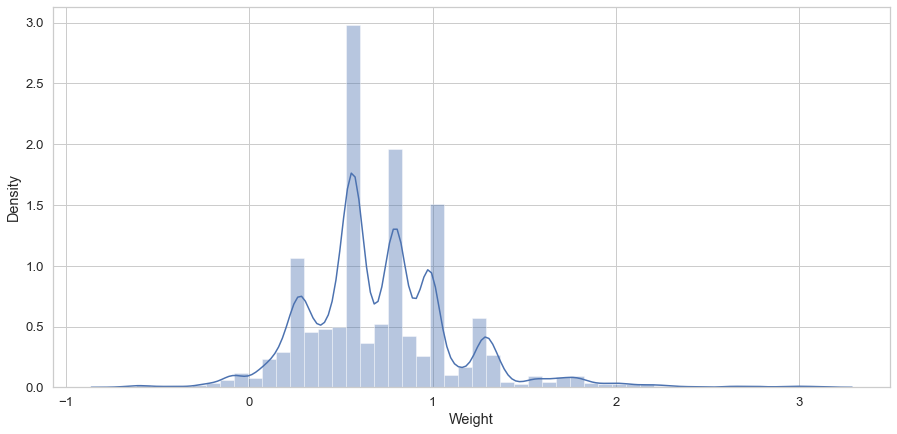

In [80]:
sns.distplot(np.log(Labtop['Weight']))

<AxesSubplot:xlabel='Weight', ylabel='Total_Price'>

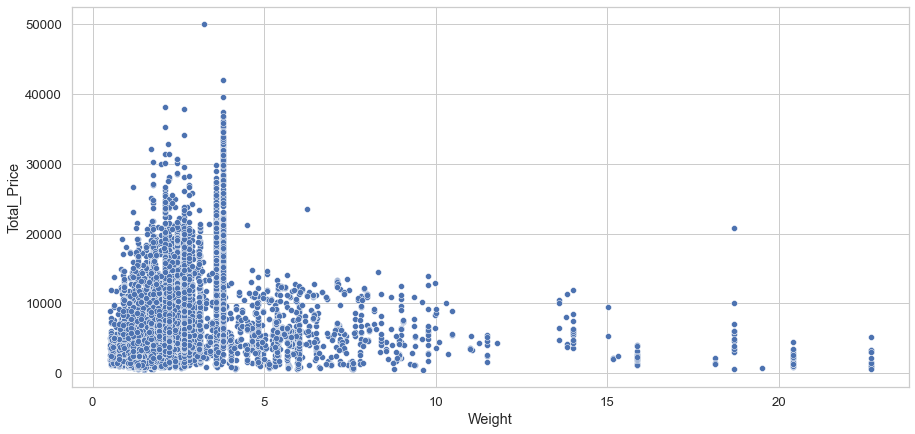

In [81]:
sns.scatterplot(Labtop['Weight'],Labtop['Total_Price'])

<AxesSubplot:xlabel='Total_Price', ylabel='Density'>

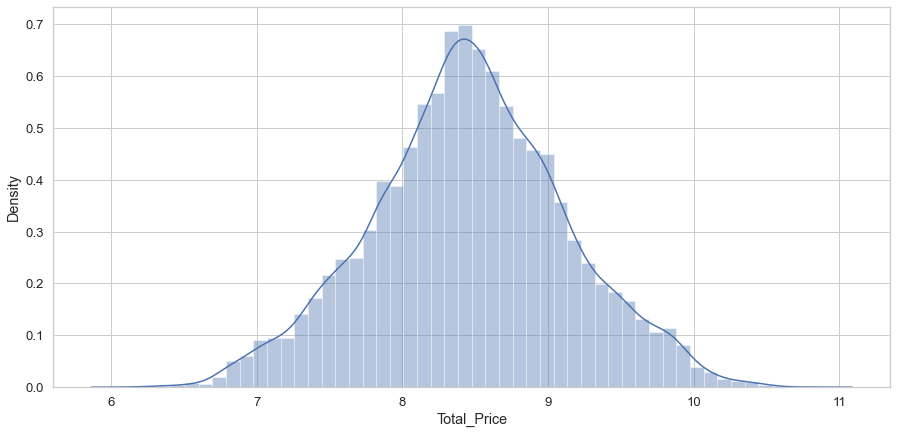

In [82]:
sns.distplot(np.log(Labtop['Total_Price']))

<AxesSubplot:xlabel='Total_Price', ylabel='Density'>

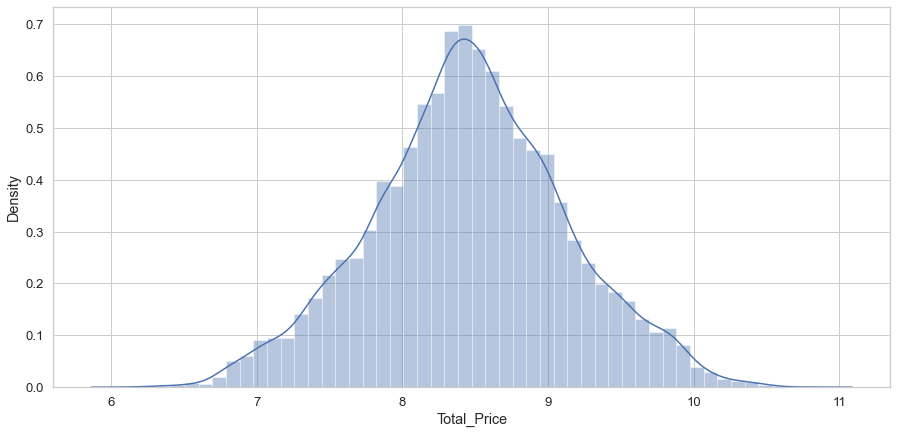

In [83]:
# so if we apply np.log to the Price col we get a gaussian distibution

sns.distplot(np.log(Labtop['Total_Price']))

# Standard processing and Training/Test set Split

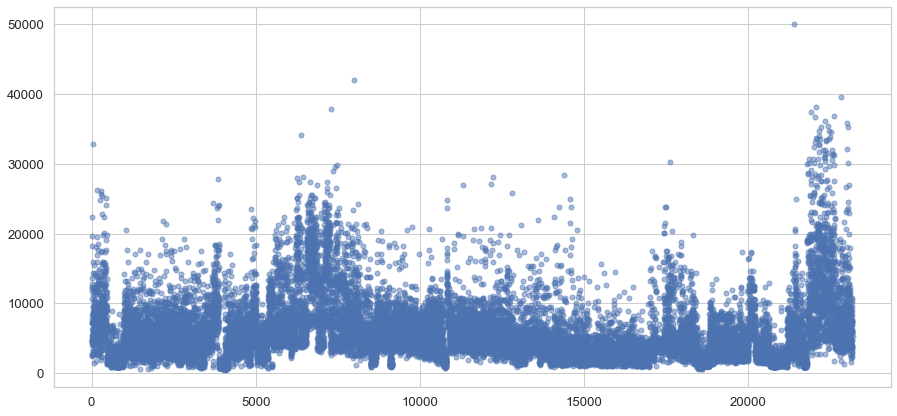

In [84]:
plt.plot(Labtop["Total_Price"], "bo", alpha=0.50, markersize=5)

In [149]:
Labtop_filtered = Labtop[Labtop["Total_Price"] < 30000]

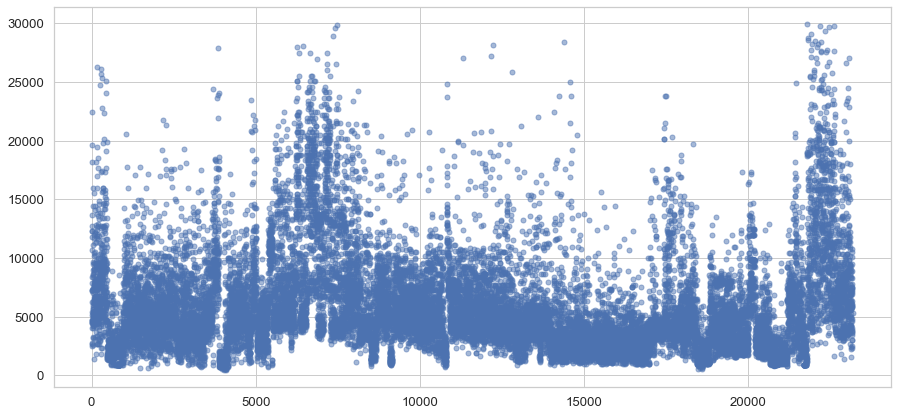

In [150]:
plt.plot(Labtop_filtered["Total_Price"], "bo", alpha=0.50, markersize=5)

In [151]:
X = Labtop_filtered.drop(["Total_Price"],axis=1)
Y = Labtop_filtered["Total_Price"]

# Standard processing and Training/Test set Split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.50,random_state=66,shuffle=True)  #01 -66 91%
# resort y_test, and using the same order sorting x
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
X_test = X_test.values[order, :]
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#################################################################################################################
# The Best hyper prameters 
estimators = [('Decision tree', DecisionTreeRegressor()),
('Random Forest', RandomForestRegressor()),
('SVR', LinearSVR(random_state=42))              
             ]
             
grid_params = {
    "kernel": ["rbf"],
    "gamma": [10 ** i for i in range(-2, 1)],
    "C": [3 ** i for i in range(4, 10)],
}

models = {
    "GBregressor":GradientBoostingRegressor(),
    "StackingRegressor": StackingRegressor(estimators=estimators,final_estimator=LinearRegression()),
    "Lasso ":LassoCV(),
    "Ridge":RidgeCV(),
    "KNN" : KNeighborsRegressor(),
    "DecisionTree" : DecisionTreeRegressor(random_state = 100),
    "RandomForest" : RandomForestRegressor(n_estimators = 100, random_state = 0),
    "XGB" : XGBRegressor(),
    "BaggingRegressor" : BaggingRegressor(n_estimators = 10,random_state = 0)

}
Results = {
    "Model":[],
    "Train Score":[],
    "Test Score":[],
}
##################################################################################################
####################################################################################################
# Create Dataframe with Test Data  Features and Predict and concatenat it 
# ## Prediction on the whole Dataset 
x_cols = X.columns
y_cols = ["Total_Price"]
Data_x = pd.DataFrame(X_test,columns=[x_cols])
Data_y = pd.DataFrame(y_test,columns=[y_cols])
Data = pd.concat([Data_y],axis=1)
##################################################################################################
for name, model in models.items():
    model.fit(X_train,y_train)
    train_s = model.score(X_train,y_train)
    test_s = model.score(X_test,y_test)
    y_pred = model.predict(X_test)
    accuracy = r2_score(y_test,y_pred)
    ############################################
    ############################################
    Results["Model"].append(name)
    Results["Train Score"].append(train_s)
    Results["Test Score"].append(test_s)
    Data[f"{name} {test_s,2}"] = pd.Series(y_pred)
    joblib.dump(model, f'Model/Labtop/Model_Labtop_{name}_Test_Acc_{test_s}.h5') # ## Save the Model
    joblib.dump(scaler, f'Model/Labtop/Scaler_Model_Labtop_{name}.h5') # ## Save the Model
scores = pd.DataFrame(Results)
#################################################################################################
scores


,Model,Train Score,Test Score
0,GBregressor,0.808072,0.878955
1,StackingRegressor,0.983480,0.927721
2,Lasso,0.677347,0.798848
3,Ridge,0.677252,0.798393
4,KNN,0.813646,0.789680
5,DecisionTree,0.999970,0.701692
6,RandomForest,0.979908,0.924151
7,XGB,0.943207,0.932968
8,BaggingRegressor,0.970045,0.913993


In [101]:
X.head(1)

,Brand,Color,Date_First_Year,Product_Type,Product_Style,Product_Usage,Weight,CPU_Brand,CPU_Model,CPU_Series,CPU_Gen,Cores,CPU_Speed,Core_Name,GPU_Brand,GPU_Model,Video_Memory,Is_SSD,Storage_HDD,Storage_SSD,SSD_Type,Memory_capacity,Memory_Type,Memory_Speed,OS_Corporation,OS_Version,Screen_Size,X_res,Y_res,Res_Type,Touchscreen,WideScreen,Screen_Tec,WebCam,AC_Power,Battery_Cell,Power_Supply_W,Bluetooth,Bluetooth_V,Ethernet,WiFi_Ver,Has_Thunderbolt,Type_C_Count,Type_A_Count,USB_C_Ver,PPI
0,9,2,2022.0,0,3,3,2.249818,0,22,1,7,6.0,3.3,5,4,1,4.0,1.0,0.0,512.0,1,8.0,5,3200.0,4,9,15.6,1920.0,1080.0,1,0.0,0.0,3,2,111.0,2.6,170.0,1.0,5.0,0.0,2,1.0,2.0,2.0,3,141.0


In [89]:
Data.loc[:,"Total_Price":].sample(2)

,Total_Price,"GBregressor (0.8789549130754933, 2)","StackingRegressor (0.9287306121679944, 2)","Lasso (0.7988484890904217, 2)","Ridge (0.798392871158616, 2)","KNN (0.7896804842856167, 2)","DecisionTree (0.7016921329439441, 2)","RandomForest (0.9241508604602842, 2)","XGB (0.9329675584133759, 2)","BaggingRegressor (0.913992921550354, 2)"
336,6964.00,6703.834584,6759.546872,5717.053051,5673.230256,6160.840,6876.60,6733.0017,7509.142090,6570.235
83,2616.95,3520.405100,3794.983685,832.040245,802.298259,5582.766,4019.95,3641.1540,4362.734375,4000.302


In [125]:
X.sample()

,Brand,Color,Date_First_Year,Product_Type,Product_Style,Product_Usage,Weight,CPU_Brand,CPU_Model,CPU_Series,CPU_Gen,Cores,CPU_Speed,Core_Name,GPU_Brand,GPU_Model,Video_Memory,Is_SSD,Storage_HDD,Storage_SSD,SSD_Type,Memory_capacity,Memory_Type,Memory_Speed,OS_Corporation,OS_Version,Screen_Size,X_res,Y_res,Res_Type,Touchscreen,WideScreen,Screen_Tec,WebCam,AC_Power,Battery_Cell,Power_Supply_W,Bluetooth,Bluetooth_V,Ethernet,WiFi_Ver,Has_Thunderbolt,Type_C_Count,Type_A_Count,USB_C_Ver,PPI
18654,6,15,2022.0,0,2,0,1.20202,3,7,5,1,2.0,1.1,5,3,2,4.0,1.0,0.0,32.0,1,4.0,5,1759.6,2,0,11.6,1366.0,768.0,1,0.0,0.0,0,2,45.0,2.4,504.0,0.0,4.48,0.0,2,0.0,6.0,6.0,2,135.0


In [118]:
a = X.sample(1).values.tolist()

In [126]:
a = X.sample(1).values.tolist()
Model_Labtop = joblib.load("Model/Labtop/Model_Labtop_XGB_Test_Acc_0.9329675584133759.h5")
Model_Labtop_Scaller = joblib.load("Model/Labtop/Scaler_Model_Labtop_XGB.h5")
predict = round(Model_Labtop.predict(Model_Labtop_Scaller.transform(a))[0],2)
predict

6523.18

Text(0.5, 1.0, 'Train Score')

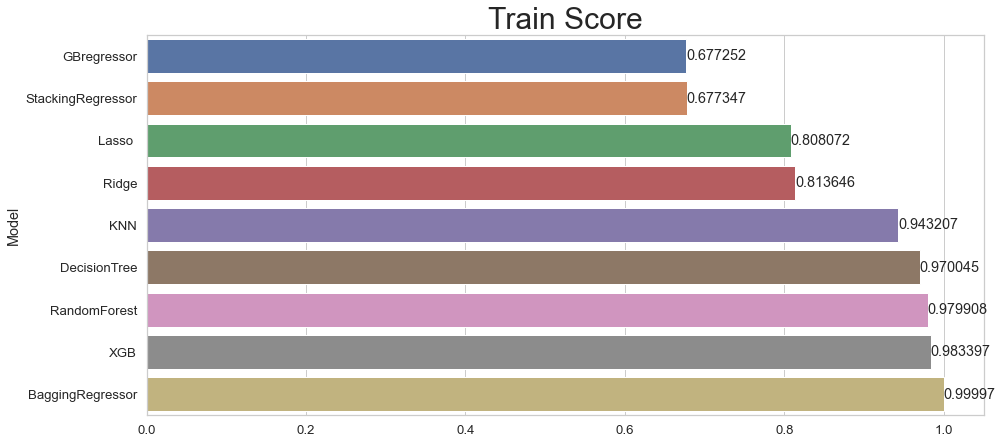

In [90]:
ax = sns.barplot(y=scores['Model'], x=sorted(scores['Train Score']))
for container in ax.containers:
    ax.bar_label(container)
plt.title("Train Score",fontsize=30)

Text(0.5, 1.0, 'Test Score')

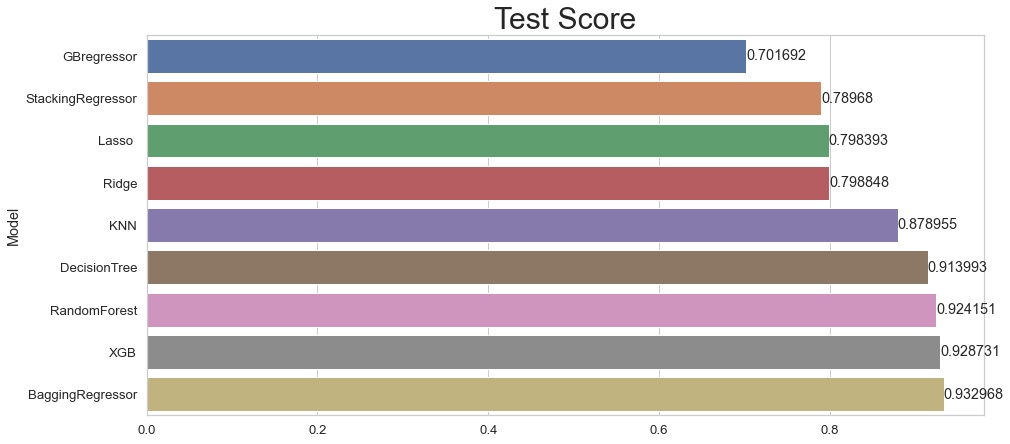

In [91]:
ax = sns.barplot(y=scores['Model'], x=sorted(scores['Test Score']))
for container in ax.containers:
    ax.bar_label(container)
plt.title("Test Score",fontsize=30)

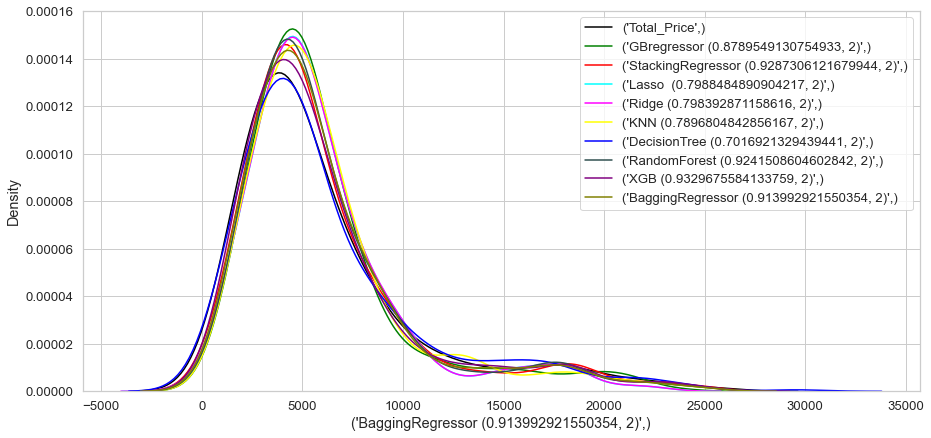

In [92]:
plot_list = Data.loc[:,"Total_Price":].columns
model_dict = {}
colors = ["black","green","red","cyan","magenta","yellow","blue","darkslategray","purple","olive","yellow"]
for i,col in enumerate(plot_list):
        model_dict[col] = colors[i]

for key,color in model_dict.items():
            sns.distplot(Data[key],hist=False,color=color,label=key)
plt.legend()
plt.show()

<hr>

# i'll choose XGB Model  that Test Accuracy 93%

<hr>

# Reverse Label Encoder To Dict

In [93]:
Var_Names = []
for var in Labtop_filtered[categorical_columns]:
    Var_Names.append(locals()[var])
for index,var in enumerate(Labtop_filtered[categorical_columns].columns.tolist()):
    (pd.DataFrame.from_dict(data=Var_Names[index], orient='index')
    .to_csv(f'Reverse_Label/Desktop/Labtop_Reverse_{var}.csv'))

In [94]:
# Reading All CSV File into Variables and Create Dataframe as a Read CSV File.
from os import listdir
from os.path import isfile, join
path = ".Reverse_Label/Desktop"
CSV_Files = sorted([f for f in listdir(path) if isfile(join(path, f))])
Var_Names_ = []
for i in CSV_Files:
    var = i.replace("(", "").replace(")", "").replace(".csv","").replace(" ", "_")
    locals()[var] = pd.read_csv(path+"/"+i)
    locals()[var] = locals()[var].to_numpy().tolist()
    locals()[var] = { k[0]: k[1] for k in locals()[var] }
##############################################################################

FileNotFoundError: [WinError 3] The system cannot find the path specified: '.Reverse_Label/Desktop'

In [ ]:
GPU_Brand

{'NVIDIA': 4, 'Intel': 3, 'Imagination': 2, 'ARM': 0, 'Apple': 1}

In [ ]:
Product_Type

{'Labtop Computers': 0}

In [ ]:
Labtop_filtered["Video_Memory"]

In [ ]:
[Brand_,Color_,Date_,Product_Type_,Style_,Usage_,Weight_,CPU_Brand_,CPU_Model_,CPU_Series_,CPU_Gen_,CPU_Cores_,CPU_Speed_,Core_Name_,GPU_Brand_,GPU_Model_,Video_Memory,Is_SSD_,Storage_HDD_,Storage_SSD_,SSD_Type_,,Memory_capacity_,Memory_Type_,Memory_Speed_,OS_Corporation_,OS_Version_,Screen_Size_,X_res_,Y_res_,Res_Type_,Touchscreen_,WideScreen_,Screen_Tec_,WebCam_,AC_Power_,Battery_Cell_,Power_Supply_W_,,Bluetooth_,Bluetooth_V_,Ethernet_,WiFi_Ver_,Thunderbolt_,Type_C_Count_,Type_A_Count_,USB_C_Ver_,PPI_]

In [ ]:
X.columns

Index(['Brand', 'Color', 'Date_First_Year', 'Product_Type', 'Product_Style', 'Product_Usage', 'Weight', 'CPU_Brand', 'CPU_Model', 'CPU_Series', 'CPU_Gen', 'Cores', 'CPU_Speed', 'Core_Name', 'GPU_Brand', 'GPU_Model', 'Video_Memory', 'Is_SSD', 'Storage_HDD', 'Storage_SSD', 'SSD_Type', 'Memory_capacity', 'Memory_Type', 'Memory_Speed', 'OS_Corporation', 'OS_Version', 'Screen_Size', 'X_res', 'Y_res', 'Res_Type', 'Touchscreen', 'WideScreen', 'Screen_Tec', 'WebCam', 'AC_Power', 'Battery_Cell', 'Power_Supply_W', 'Bluetooth', 'Bluetooth_V', 'Ethernet', 'WiFi_Ver', 'Has_Thunderbolt', 'Type_C_Count', 'Type_A_Count', 'USB_C_Ver', 'PPI'], dtype='object')

In [ ]:
Row_Desktop_Data = ["Brand_","Color_","Date_","Product_Type","Style_","Usage_","Weight_","CPU_Brand_","CPU_Brand_","CPU_Model_","CPU_Series_","CPU_Gen_","CPU_Cores_","CPU_Speed_","Core_Name_","GPU_Brand_","GPU_Model_","Video_Memory_","Is_SSD_","Storage_HDD_","Storage_SSD_","SSD_Type_","Memory_capacity_","Memory_Type_","Memory_Speed_","OS_Corporation_","OS_Version_","Screen_Size_","X_res_","Y_res_","Res_Type_","Touchscreen_","WideScreen_","Screen_Tec_","WebCam_","AC_Power_","Battery_Cell","Power_Supply_W_","","Bluetooth_","Bluetooth_V_","Ethernet_","WiFi_Ver_","Thunderbolt_","Type_C_Count_","Type_A_Count_","USB_C_Ver_","PPI_"]


In [ ]:
LENOVO - 6

Intel - 2

3rd - 6

Core - 3

i5 - 5

Black - 0

Intel - 1

Graphics - 2

DDR4 - 2

Microsoft - 2

Windows 10 Home - 3

Mini - 0

Personal - 3

M.2 - 0

USB C 3.0 - 1

Wifi 4 - 0